In [ ]:
!pip install ohmeow-blurr -q
!pip install bert-score -q
!pip install transformers
!pip install fastai
!pip install sacremoses
import pandas as pd
from fastai.text.all import *
from transformers import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

     |████████████████████████████████| 81 kB 3.9 MB/s 
     |████████████████████████████████| 60 kB 8.2 MB/s 
     |████████████████████████████████| 1.2 MB 29.5 MB/s 
     |████████████████████████████████| 197 kB 62.7 MB/s 
     |████████████████████████████████| 96 kB 5.7 MB/s 
     |████████████████████████████████| 362 kB 60.5 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 4.4 MB 35.7 MB/s 
     |████████████████████████████████| 6.6 MB 55.9 MB/s 
     |████████████████████████████████| 86 kB 4.8 MB/s 
     |████████████████████████████████| 596 kB 68.7 MB/s 
     |████████████████████████████████| 1.1 MB 52.9 MB/s 
     |████████████████████████████████| 212 kB 77.4 MB/s 
     |████████████████████████████████| 140 kB 79.0 MB/s 
     |████████████████████████████████| 127 kB 78.5 MB/s 
     |████████████████████████████████| 271 kB 76.9 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
     |████████████████████

In [ ]:
#Get data
path = '/content/sample_data/train.csv'
df = pd.read_csv(path)
df = df.dropna().reset_index()

#df = df[(df['stance']=='Argument_against') & (df['topic']=='cloning')]
##df = df[(df['language']=='english') & (df['type']=='bs')].reset_index()
df = df[['aspect_pos_string','sentence']]

#Clean text
df['sentence'] = df['sentence'].apply(lambda x: x.replace('\n',''))
aspects = df.head(100)
aspects.head()

pretrained_model = "sshleifer/distilbart-cnn-6-6"
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(pretrained_model,
model_cls=BartForConditionalGeneration)

hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)
preprocessor = SummarizationPreprocessor(
    hf_tokenizer,
    id_attr="index",
    text_attr="sentence",
    target_text_attr = "aspect_pos_string",
    
    max_input_tok_length =156,
    max_target_tok_length = 150,
    min_summary_char_length = 30,
       
)

proc_df = preprocessor.process_df(aspects)
proc_df.head(4)

Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/439M [00:00<?, ?B/s]

,proc_aspect_pos_string,proc_sentence,aspect_pos_string,sentence,sentence_start_char_idx,sentence_end_char_idx,aspect_pos_string_start_char_idx,aspect_pos_string_end_char_idx
0,"['natural process of conception', 'morally condemned']","In addition , anything that thwarts the natural process of conception ( i.e. , birth control ) may also be morally condemned .","['natural process of conception', 'morally condemned']","In addition , anything that thwarts the natural process of conception ( i.e. , birth control ) may also be morally condemned .",0,126,0,54
1,"['moral problems', 'exploitation of women']","There are other serious moral problems associated with cloning-for-biomedical-research , including the exploitation of women who will be needed to provide eggs .","['moral problems', 'exploitation of women']","There are other serious moral problems associated with cloning-for-biomedical-research , including the exploitation of women who will be needed to provide eggs .",0,161,0,43
2,"['race', 'arbitrary factors', 'economics and geography', 'determinant']","Until race and other arbitrary factors , like economics and geography , can be eliminated as a determinant of who lives and who dies , the death penalty must not be used .","['race', 'arbitrary factors', 'economics and geography', 'determinant']","Until race and other arbitrary factors , like economics and geography , can be eliminated as a determinant of who lives and who dies , the death penalty must not be used .",0,171,0,71
3,"['rich and guilty', 'poor and innocent']",Death sentences are imposed in a criminal justice system that treats you better if you are rich and guilty than if you are poor and innocent .,"['rich and guilty', 'poor and innocent']",Death sentences are imposed in a criminal justice system that treats you better if you are rich and guilty than if you are poor and innocent .,0,142,0,40


In [ ]:
text_gen_kwargs = default_text_gen_kwargs(hf_config, hf_model, task="summarization")
batch_tokenize_transform = Seq2SeqBatchTokenizeTransform(
    hf_arch, hf_config, hf_tokenizer, hf_model, text_gen_kwargs=
 {'max_length': 20,'min_length': 3,'do_sample': False, 'early_stopping': True, 'num_beams': 4, 'temperature': 1.0, 
  'top_k': 50, 'top_p': 1.0, 'repetition_penalty': 1.0, 'bad_words_ids': None, 'bos_token_id': 0, 'pad_token_id': 1,
 'eos_token_id': 2, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'encoder_no_repeat_ngram_size': 0,
 'num_return_sequences': 1, 'decoder_start_token_id': 2, 'use_cache': True, 'num_beam_groups': 1,
 'diversity_penalty': 0.0, 'output_attentions': False, 'output_hidden_states': False, 'output_scores': False,
 'return_dict_in_generate': False, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2, 'remove_invalid_values': False}
)

blocks = (Seq2SeqTextBlock(batch_tokenize_tfm=batch_tokenize_transform),noop)
dblock = DataBlock(blocks=blocks, get_x=ColReader("sentence"), get_y=ColReader("aspect_pos_string"), splitter=RandomSplitter())

#splitter=GrandparentSplitter(train_name='/content/sample_data/train.csv', valid_name='/content/sample_data/test.csv')

dls = dblock.dataloaders(proc_df, bs=2)
one=dls.one_batch()
len(one), one[0]["input_ids"].shape, one[1].shape

seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
        },
        'bertscore': {
            'compute_kwargs': { 'lang': 'fr' },
            'returns': ["precision", "recall", "f1"]}}

model = BaseModelWrapper(hf_model)
learn_cbs = [BaseModelCallback]
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

#training process
learn = Learner(dls, model,
                opt_func=ranger,loss_func=PreCalculatedCrossEntropyLoss(),
                cbs=learn_cbs,splitter=partial(blurr_seq2seq_splitter, arch=hf_arch)).to_fp32()

#Hyper parameters
learn.create_opt() 
learn.freeze()

In [ ]:
one_batch_only = dls.one_batch()
prediction = learn.model(one[0])
prediction
len(prediction), prediction["loss"].shape,prediction["logits"].shape



(3, torch.Size([]), torch.Size([2, 22, 50264]))

SuggestedLRs(minimum=2.7542287716642023e-05, steep=6.309573450380412e-07, valley=4.365158383734524e-05, slide=6.30957365501672e-05)

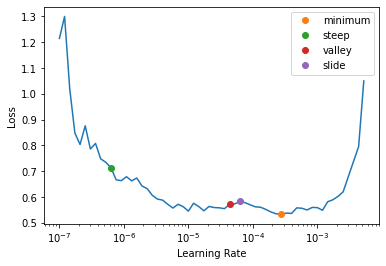

In [ ]:
learn.lr_find(suggest_funcs=[minimum,steep,valley,slide])

In [ ]:
import nltk
nltk.download('punkt')
learn.fit_one_cycle(3, lr_max=4e-4,cbs=fit_cbs)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1,time
0,0.671887,0.658287,0.792272,0.679526,0.794699,0.945647,0.941442,0.943318,00:11
1,0.603481,0.633141,0.741259,0.631435,0.715285,0.942546,0.933932,0.938069,00:09
2,0.428382,0.593985,0.781598,0.660120,0.755375,0.950603,0.942150,0.946207,00:09


In [ ]:
learn.show_results(max_n=9, learner=learn,input_trunc_at=750, target_trunc_at=175)


,text,target,prediction
0,"Former US Vice-President Al Gore said ( 18/9/06 ) : "" During my eight years in the White House, every nuclear weapons proliferation issue we dealt with was connected to a nuclear reactor program.",['nuclear weapons proliferation'],"[ ['nuclear weapons proliferation'], ['stimulates consumption', 'money', 'spending']]"
